# Baseline Results

In [32]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [3]:
df.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(29332, 87)

In [5]:
df["Result"].value_counts()

1    14700
0    14632
Name: Result, dtype: int64

In [6]:
y = df["Result"]
X = df.drop(labels=["Result"], axis=1)

In [7]:
print(y.shape)
print(X.shape)

(29332,)
(29332, 86)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=69
)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(20532, 86)
(20532,)
(4400, 86)
(4400,)
(4400, 86)
(4400,)


In [12]:
model_objs = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    SVC(kernel="poly"),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    XGBClassifier(random_state=69),
]
model_names = [
    "LogisticRegression",
    "KNeighborsClassifier",
    "Linear SVC",
    "Gaussian SVC",
    "Polynomial SVC",
    "DecisionTreeClassifier",
    "AdaBoostClassifier",
    "RandomForestClassifier",
    "XGBClassifier",
]

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [14]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_pred = m_obj.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    roc_auc = roc_auc_score(y_pred, y_test)
    print("MODEL: {}".format(m_name))
    print("Accuracy: {}".format(acc))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F1: {}".format(f1))
    print("ROC AUC: {}".format(roc_auc))
    print()
    y_pred_val = m_obj.predict(X_val)
    acc_val = accuracy_score(y_pred_val, y_val)
    precision_val = precision_score(y_pred_val, y_val)
    recall_val = recall_score(y_pred_val, y_val)
    f1_val = f1_score(y_pred_val, y_val)
    roc_auc_val = roc_auc_score(y_pred_val, y_val)
    print("VALIDATION")
    print("Accuracy: {}".format(acc_val))
    print("Precision: {}".format(precision_val))
    print("Recall: {}".format(recall_val))
    print("F1: {}".format(f1_val))
    print("ROC AUC: {}".format(roc_auc_val))
    print()
    print()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MODEL: LogisticRegression
Accuracy: 0.9563636363636364
Precision: 0.9668660837551771
Recall: 0.9459702836560108
F1: 0.9563040509786072
ROC AUC: 0.9564638017637557

VALIDATION
Accuracy: 0.9593181818181818
Precision: 0.963855421686747
Recall: 0.9565987599645704
F1: 0.960213380751278
ROC AUC: 0.9593918169570752


MODEL: KNeighborsClassifier
Accuracy: 0.961590909090909
Precision: 0.9687068568798896
Recall: 0.9542157751586582
F1: 0.9614067138616122
ROC AUC: 0.961611078098928

VALIDATION
Accuracy: 0.9602272727272727
Precision: 0.9647478804105311
Recall: 0.9574844995571302
F1: 0.9611024672149366
ROC AUC: 0.9603015401613849


MODEL: Linear SVC
Accuracy: 0.9520454545454545
Precision: 0.9604233778186838
Recall: 0.9434900542495479
F1: 0.9518814139110605
ROC AUC: 0.9520923763021049

VALIDATION
Accuracy: 0.9540909090909091
Precision: 0.9558232931726908
Recall: 0.9541202672605791
F1: 0.9549710209540794
ROC AUC: 0.9540902960432827


MODEL: Gaussian SVC
Accuracy: 0.9634090909090909
Precision: 0.967786

# Grid Search

Default used so far:

```Random state: 69
n_estimators: 100
criterion: 'gini'
max_features: 'sqrt'
```

In [15]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [16]:
X_train_test_concat = pd.concat([X_train, X_test])
y_train_test_concat = pd.concat([y_train, y_test])

In [18]:
split_index = [0 if x in X_test.index else -1 for x in X_train_test_concat.index] # Predefined split so cross val uses our test set

In [19]:
len(split_index)

24932

In [20]:
ps = PredefinedSplit(split_index)

In [21]:
param_grid = {
    "criterion": ("gini", "entropy"),
    "n_estimators": tuple(range(100, 1100, 100)),
    "max_features": ("sqrt", "log2", None),
}

In [22]:
estimator = RandomForestClassifier(random_state=69)

In [23]:
search = GridSearchCV(
    estimator=estimator, param_grid=param_grid, verbose=10, cv=ps, scoring="accuracy"
)

In [24]:
import pickle

In [25]:
search.fit(X_train_test_concat, y_train_test_concat)

Fitting 1 folds for each of 60 candidates, totalling 60 fits
[CV 1/1; 1/60] START criterion=gini, max_features=sqrt, n_estimators=100........
[CV 1/1; 1/60] END criterion=gini, max_features=sqrt, n_estimators=100; total time=   3.5s
[CV 1/1; 2/60] START criterion=gini, max_features=sqrt, n_estimators=200........
[CV 1/1; 2/60] END criterion=gini, max_features=sqrt, n_estimators=200; total time=   6.6s
[CV 1/1; 3/60] START criterion=gini, max_features=sqrt, n_estimators=300........
[CV 1/1; 3/60] END criterion=gini, max_features=sqrt, n_estimators=300; total time=  10.0s
[CV 1/1; 4/60] START criterion=gini, max_features=sqrt, n_estimators=400........
[CV 1/1; 4/60] END criterion=gini, max_features=sqrt, n_estimators=400; total time=  14.0s
[CV 1/1; 5/60] START criterion=gini, max_features=sqrt, n_estimators=500........
[CV 1/1; 5/60] END criterion=gini, max_features=sqrt, n_estimators=500; total time=  16.9s
[CV 1/1; 6/60] START criterion=gini, max_features=sqrt, n_estimators=600.......

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=69),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 'log2', None),
                         'n_estimators': (100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000)},
             scoring='accuracy', verbose=10)

In [33]:
with open("search.pkl", "wb") as f:
    pickle.dump(search, f, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 600}

In [35]:
search.best_score_

0.9713636363636363

In [36]:
model = search.best_estimator_

In [37]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1: {}".format(f1))
print("ROC AUC: {}".format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_pred_val, y_val)
precision_val = precision_score(y_pred_val, y_val)
recall_val = recall_score(y_pred_val, y_val)
f1_val = f1_score(y_pred_val, y_val)
roc_auc_val = roc_auc_score(y_pred_val, y_val)
print("VALIDATION")
print("Accuracy: {}".format(acc_val))
print("Precision: {}".format(precision_val))
print("Recall: {}".format(recall_val))
print("F1: {}".format(f1_val))
print("ROC AUC: {}".format(roc_auc_val))

Accuracy: 0.9802272727272727
Precision: 0.975609756097561
Recall: 0.9842154131847726
F1: 0.9798936907788307
ROC AUC: 0.9803089532531164


VALIDATION
Accuracy: 0.9702272727272727
Precision: 0.9678714859437751
Recall: 0.9735188509874326
F1: 0.9706869545759679
ROC AUC: 0.9701848398583571


In [38]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(search.best_estimator_, f, protocol=pickle.HIGHEST_PROTOCOL)

# Feature importance and extraction

### Using correlation

In [39]:
correlation_matrix = df.corr()

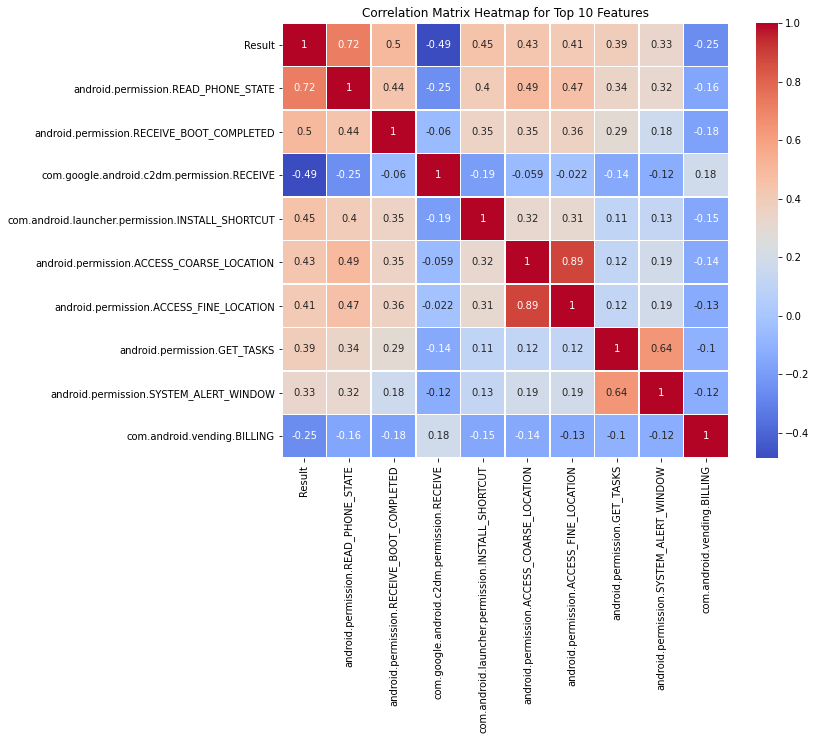

In [40]:
# Correlation Matrix
correlation_with_target = df.corr()['Result'].abs()

top_features = correlation_with_target.sort_values(ascending=False).head(10).index

df_top_features = df[top_features]

correlation_matrix_top = df_top_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap for Top 10 Features')
plt.show()

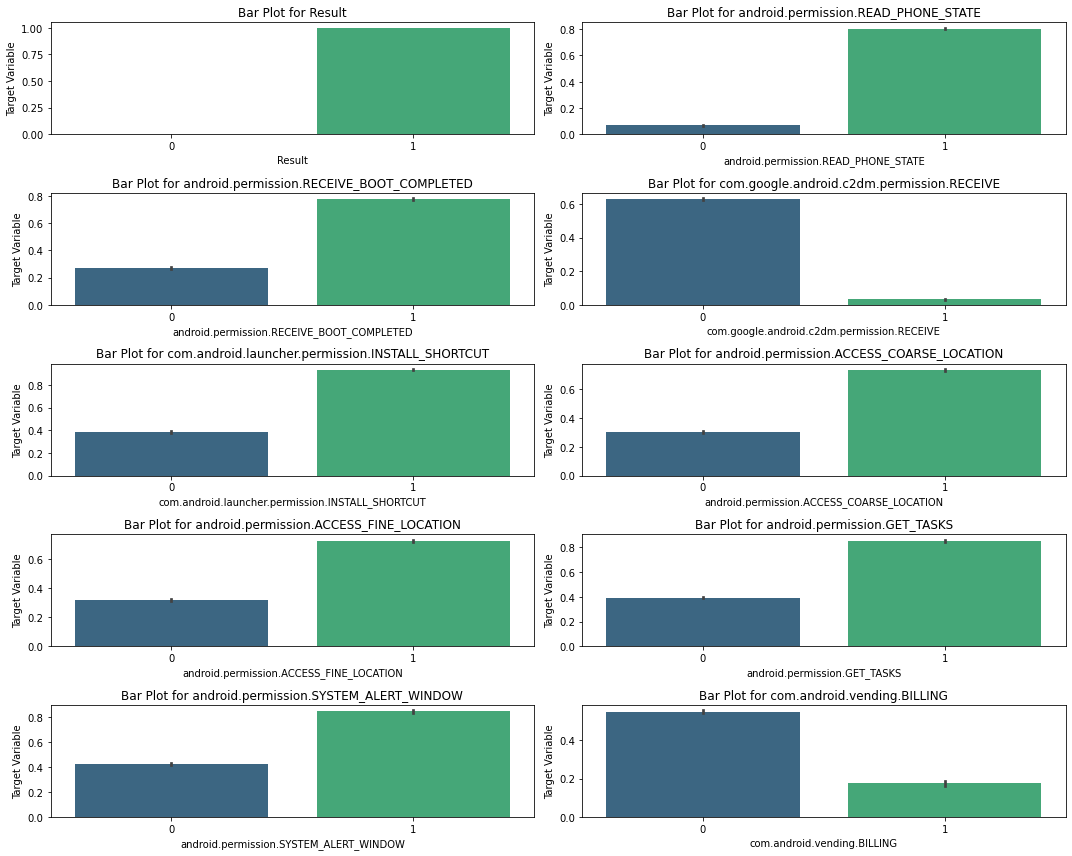

In [41]:
# Create bar plots for each of the top 10 features
plt.figure(figsize=(15, 12))

for i, feature in enumerate(top_features.values, 1):
    plt.subplot(5, 2, i)
    sns.barplot(x=df[feature], y=df['Result'], palette="viridis")
    # sns.barplot(x=df[feature], y=df['Result'], hue=df['Result'], palette="viridis", dodge=True, legend=False)

    plt.title('Bar Plot for {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Target Variable')

plt.tight_layout()
plt.show()

In [44]:
# After removing correlated features
y = df_selected_features['Result']
X = df_selected_features.drop(labels=['Result'], axis=1)

In [45]:
# Taking top 10 features
y = df_top_features['Result']
X = df_top_features.drop(labels=['Result'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [49]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_pred = m_obj.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    roc_auc = roc_auc_score(y_pred, y_test)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    print()

MODEL: LogisticRegression
Accuracy: 0.9409090909090909

MODEL: KNeighborsClassifier
Accuracy: 0.9440909090909091

MODEL: Linear SVC
Accuracy: 0.9379545454545455

MODEL: Gaussian SVC
Accuracy: 0.9534090909090909

MODEL: Polynomial SVC
Accuracy: 0.9529545454545455

MODEL: DecisionTreeClassifier
Accuracy: 0.9525

MODEL: AdaBoostClassifier
Accuracy: 0.9402272727272727

MODEL: RandomForestClassifier
Accuracy: 0.9552272727272727

MODEL: XGBClassifier
Accuracy: 0.9572727272727273



### Decision tree behavior

In [50]:
y = df["Result"]
X = df.drop(labels=["Result"], axis=1)

In [51]:
print(y.shape)
print(X.shape)

(29332,)
(29332, 86)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=69
)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(20532, 86)
(20532,)
(4400, 86)
(4400,)
(4400, 86)
(4400,)


In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline


dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
col_names = df.columns

In [56]:
plt.figure(figsize=(400, 160))
plot_tree(dt, feature_names=col_names)
plt.show()

### Recursive Feature Extraction

In [57]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [58]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [59]:
model = RandomForestClassifier(random_state=69)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [60]:
pipeline.fit(X,y)
eliminated_features = X.columns[~rfe.support_]
print("\nEliminated Features:")
print(eliminated_features)


Eliminated Features:
Index(['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE', 'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.CALL_PHONE', 'android.permission.WRITE_CONTACTS',
       'com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE

In [61]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [62]:
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [64]:
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.948 (0.003)


In [67]:
X_train.shape

(20532, 86)

### Select K best

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from numpy import array
 
select = SelectKBest(score_func=chi2, k=76)
Z = select.fit_transform(X,y)

In [70]:
Z.shape

(29332, 76)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

In [72]:
X_train.shape

(20532, 76)

In [73]:
print("VALIDATION ACCURACY")
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_val_pred = m_obj.predict(X_val)
    val_acc = accuracy_score(y_val_pred,y_val)
    print('MODEL: {}'.format(m_name))
    print('Validation Accuracy: {}'.format(val_acc))
    print()

VALIDATION ACCURACY


MODEL: LogisticRegression
Validation Accuracy: 0.9538636363636364

MODEL: KNeighborsClassifier
Validation Accuracy: 0.9534090909090909

MODEL: Linear SVC
Validation Accuracy: 0.9493181818181818

MODEL: Gaussian SVC
Validation Accuracy: 0.9652272727272727

MODEL: Polynomial SVC
Validation Accuracy: 0.9572727272727273

MODEL: DecisionTreeClassifier
Validation Accuracy: 0.9613636363636363

MODEL: AdaBoostClassifier
Validation Accuracy: 0.9538636363636364

MODEL: RandomForestClassifier
Validation Accuracy: 0.9686363636363636

MODEL: XGBClassifier
Validation Accuracy: 0.9672727272727273



In [74]:
print("TEST ACCURACY")
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train, y_train),
    y_pred = m_obj.predict(X_test)
    y_val_pred = m_obj.predict(X_val)
    acc = accuracy_score(y_pred, y_test)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    print()

TEST ACCURACY


MODEL: LogisticRegression
Accuracy: 0.9543181818181818

MODEL: KNeighborsClassifier
Accuracy: 0.9590909090909091

MODEL: Linear SVC
Accuracy: 0.9459090909090909

MODEL: Gaussian SVC
Accuracy: 0.9631818181818181

MODEL: Polynomial SVC
Accuracy: 0.9606818181818182

MODEL: DecisionTreeClassifier
Accuracy: 0.9647727272727272

MODEL: AdaBoostClassifier
Accuracy: 0.951590909090909

MODEL: RandomForestClassifier
Accuracy: 0.9709090909090909

MODEL: XGBClassifier
Accuracy: 0.9695454545454546



# Feature subset training: Native and custom permissions

In [75]:
y = df["Result"]
X = df.drop(labels=["Result"], axis=1)

In [76]:
X.shape

(29332, 86)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=69
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=69
)

In [78]:
X_train.shape

(20532, 86)

In [79]:
features = df.columns

In [80]:
native_features = [f for f in features if f.startswith('android') or f.startswith('com.android')]

In [81]:
custom_features = [f for f in features if not f in native_features and not f=='Result']

In [82]:
native_df = df[native_features]
custom_df = df[custom_features]
label = df['Result']

### Training only with native permissions

In [83]:
from sklearn.model_selection import train_test_split

X_train_native, X_test_native, y_train_native, y_test_native = train_test_split(native_df, label, test_size=0.3, random_state=69)
X_test_native, X_val_native, y_test_native, y_val_native = train_test_split(X_test_native, y_test_native, test_size=0.5, random_state=69)

In [84]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train_native, y_train_native),
    y_pred = m_obj.predict(X_test_native)
    acc = accuracy_score(y_pred, y_test_native)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    print()
    print()

MODEL: LogisticRegression
Accuracy: 0.9440909090909091


MODEL: KNeighborsClassifier
Accuracy: 0.955


MODEL: Linear SVC
Accuracy: 0.9377272727272727


MODEL: Gaussian SVC
Accuracy: 0.9534090909090909


MODEL: Polynomial SVC
Accuracy: 0.9488636363636364


MODEL: DecisionTreeClassifier
Accuracy: 0.9595454545454546


MODEL: AdaBoostClassifier
Accuracy: 0.9413636363636364


MODEL: RandomForestClassifier
Accuracy: 0.9654545454545455


MODEL: XGBClassifier
Accuracy: 0.9597727272727272




In [85]:
model = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=600)
model.fit(X_train_native, y_train_native)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=600)

In [86]:
y_pred = model.predict(X_test_native)
acc = accuracy_score(y_pred, y_test_native)
precision = precision_score(y_pred, y_test_native)
recall = recall_score(y_pred, y_test_native)
f1 = f1_score(y_pred, y_test_native)
roc_auc = roc_auc_score(y_pred, y_test_native)
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1: {}'.format(f1))
print('ROC AUC: {}'.format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val_native)
acc_val = accuracy_score(y_pred_val, y_val_native)
precision_val = precision_score(y_pred_val, y_val_native)
recall_val = recall_score(y_pred_val, y_val_native)
f1_val = f1_score(y_pred_val, y_val_native)
roc_auc_val = roc_auc_score(y_pred_val, y_val_native)
print('VALIDATION')
print('Accuracy: {}'.format(acc_val))
print('Precision: {}'.format(precision_val))
print('Recall: {}'.format(recall_val))
print('F1: {}'.format(f1_val))
print('ROC AUC: {}'.format(roc_auc_val))

Accuracy: 0.9645454545454546
Precision: 0.9654855039116429
Recall: 0.9628269848554383
F1: 0.964154411764706
ROC AUC: 0.9645292060702225


VALIDATION
Accuracy: 0.961590909090909
Precision: 0.9602855867916109
Recall: 0.96415770609319
F1: 0.9622177509501453
ROC AUC: 0.9615530227882924


### Training on only custom features

In [87]:
from sklearn.model_selection import train_test_split

X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(custom_df, label, test_size=0.3, random_state=69)
X_test_custom, X_val_custom, y_test_custom, y_val_custom = train_test_split(X_test_custom, y_test_custom, test_size=0.5, random_state=69)

In [88]:
for m_obj, m_name in zip(model_objs, model_names):
    m_obj.fit(X_train_custom, y_train_custom),
    y_pred = m_obj.predict(X_test_custom)
    acc = accuracy_score(y_pred, y_test_custom)
    print('MODEL: {}'.format(m_name))
    print('Accuracy: {}'.format(acc))
    print()
    print()

MODEL: LogisticRegression
Accuracy: 0.72


MODEL: KNeighborsClassifier
Accuracy: 0.5136363636363637


MODEL: Linear SVC
Accuracy: 0.7202272727272727


MODEL: Gaussian SVC
Accuracy: 0.7204545454545455


MODEL: Polynomial SVC
Accuracy: 0.7204545454545455


MODEL: DecisionTreeClassifier
Accuracy: 0.7202272727272727


MODEL: AdaBoostClassifier
Accuracy: 0.7202272727272727


MODEL: RandomForestClassifier
Accuracy: 0.7204545454545455


MODEL: XGBClassifier
Accuracy: 0.7202272727272727




In [89]:
model = RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=600)
model.fit(X_train_custom, y_train_custom)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=600)

In [90]:
y_pred = model.predict(X_test_custom)
acc = accuracy_score(y_pred, y_test_custom)
precision = precision_score(y_pred, y_test_custom)
recall = recall_score(y_pred, y_test_custom)
f1 = f1_score(y_pred, y_test_custom)
roc_auc = roc_auc_score(y_pred, y_test_custom)
print('Accuracy: {}'.format(acc))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1: {}'.format(f1))
print('ROC AUC: {}'.format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val_custom)
acc_val = accuracy_score(y_pred_val, y_val_custom)
precision_val = precision_score(y_pred_val, y_val_custom)
recall_val = recall_score(y_pred_val, y_val_custom)
f1_val = f1_score(y_pred_val, y_val_custom)
roc_auc_val = roc_auc_score(y_pred_val, y_val_custom)
print('VALIDATION')
print('Accuracy: {}'.format(acc_val))
print('Precision: {}'.format(precision_val))
print('Recall: {}'.format(recall_val))
print('F1: {}'.format(f1_val))
print('ROC AUC: {}'.format(roc_auc_val))

Accuracy: 0.7204545454545455
Precision: 0.9843534284399448
Recall: 0.6413793103448275
F1: 0.7766884531590413
ROC AUC: 0.8047272138578598


VALIDATION
Accuracy: 0.7204545454545455
Precision: 0.9848282016956715
Recall: 0.6485454011166618
F1: 0.7820694542877391
ROC AUC: 0.8072215470979498


# Clustering using KModes

In [96]:
from kmodes.kmodes import KModes
import numpy as np
from sklearn.decomposition import PCA

In [92]:
kmode = KModes(n_clusters=2, init="random", n_init=5, random_state=69, n_jobs=-1)
kmode.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

In [97]:
cluster_labels = kmode.labels_
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

{0: 13338, 1: 15994}

In [98]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

In [99]:
pca_data['cluster'] = pd.Categorical(kmode.labels_)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

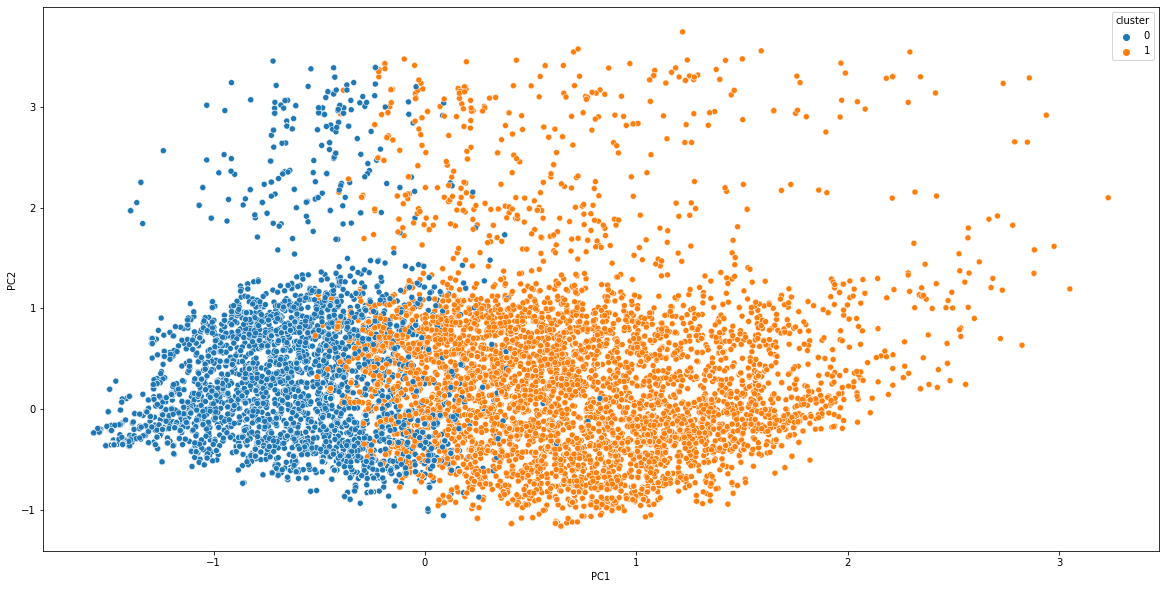

In [100]:
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [101]:
cluster_vs_label_df = pd.DataFrame({'cluster':cluster_labels, 'label':label})
cluster_vs_label_df.head()

,cluster,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [102]:
full_df = pd.concat([X, cluster_vs_label_df], axis=1)

In [103]:
print("Percent separated: {}".format(100-(len(full_df[full_df['cluster']!=full_df['label']])/len(X))*100))

Percent separated: 73.08741306423019


# Finding a reject threshold

In [104]:
model = RandomForestClassifier(random_state=69)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [105]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
print("Accuracy: {}".format(acc))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1: {}".format(f1))
print("ROC AUC: {}".format(roc_auc))
print()
print()

y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_pred_val, y_val)
precision_val = precision_score(y_pred_val, y_val)
recall_val = recall_score(y_pred_val, y_val)
f1_val = f1_score(y_pred_val, y_val)
roc_auc_val = roc_auc_score(y_pred_val, y_val)
print("VALIDATION")
print("Accuracy: {}".format(acc_val))
print("Precision: {}".format(precision_val))
print("Recall: {}".format(recall_val))
print("F1: {}".format(f1_val))
print("ROC AUC: {}".format(roc_auc_val))

Accuracy: 0.9706818181818182
Precision: 0.970547630004602
Recall: 0.9701011959521619
F1: 0.9703243616287096
ROC AUC: 0.9706750364307081


VALIDATION
Accuracy: 0.9704545454545455
Precision: 0.9692101740294511
Recall: 0.9726824899238692
F1: 0.9709432275368797
ROC AUC: 0.97042061736618


In [106]:
y_pred_val_proba = model.predict_proba(X_val)
print(y_pred_val_proba)
comparison_df = pd.DataFrame(
    {
        "val_pred_probability_0": [y[0] for y in y_pred_val_proba],
        "val_pred_probability_1": [y[1] for y in y_pred_val_proba],
        "val_pred": y_pred_val,
        "gt": y_val,
    }
)

[[0.         1.        ]
 [0.04       0.96      ]
 [0.         1.        ]
 ...
 [0.         1.        ]
 [0.94636716 0.05363284]
 [1.         0.        ]]


In [107]:
comparison_df.head()

,val_pred_probability_0,val_pred_probability_1,val_pred,gt
27040,0.00,1.00,1,1
25731,0.04,0.96,1,1
15165,0.00,1.00,1,1
10699,0.97,0.03,0,0
25129,0.00,1.00,1,1


In [108]:
fp = comparison_df.loc[(comparison_df["val_pred"] == 1) & (comparison_df["gt"] == 0)]
fn = comparison_df.loc[(comparison_df["val_pred"] == 0) & (comparison_df["gt"] == 1)]
tp = comparison_df.loc[(comparison_df["val_pred"] == 1) & (comparison_df["gt"] == 1)]
tn = comparison_df.loc[(comparison_df["val_pred"] == 0) & (comparison_df["gt"] == 0)]

In [109]:
print("Total false positives: {}".format(len(fp)))
print("Total true positives: {}".format(len(tp)))
print("Total false negatives: {}".format(len(fn)))
print("Total true positives: {}".format(len(tp)))
print("Total val samples: {}".format(len(comparison_df)))

Total false positives: 61
Total true positives: 2172
Total false negatives: 69
Total true positives: 2172
Total val samples: 4400


In [111]:
import seaborn as sns

[Text(0.5, 0, 'Probability of class=1 for false positives')]

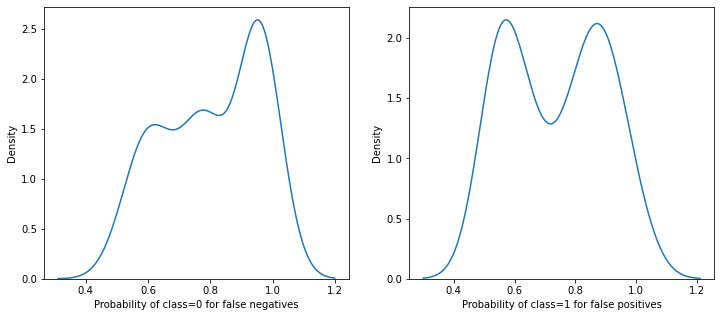

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# plt.subplot(1,1)
sns.kdeplot(fn.val_pred_probability_0, ax=ax[0])
ax[0].set(xlabel="Probability of class=0 for false negatives")
sns.kdeplot(fp.val_pred_probability_1, ax=ax[1])
ax[1].set(xlabel="Probability of class=1 for false positives")

In [114]:
reject_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for threshold in reject_thresholds:
    print("THRESHOLD = {}".format(threshold))
    reject_fp = fp[fp["val_pred_probability_1"] < threshold]
    print("Fraction of fp rejects = {}".format(len(reject_fp) / len(fp)))
    reject_tp = tp[tp["val_pred_probability_1"] < threshold]
    print("Fraction of tp rejects = {}".format(len(reject_tp) / len(tp)))
    reject_fn = fn[fn["val_pred_probability_0"] < threshold]
    print("Fraction of fn rejects = {}".format(len(reject_fn) / len(fn)))
    reject_tn = tn[tn["val_pred_probability_0"] < threshold]
    print("Fraction of tn rejects = {}".format(len(reject_tn) / len(tn)))
    print()

THRESHOLD = 0.7
Fraction of fp rejects = 0.45901639344262296
Fraction of tp rejects = 0.015193370165745856
Fraction of fn rejects = 0.2753623188405797
Fraction of tn rejects = 0.029075309818875118

THRESHOLD = 0.75
Fraction of fp rejects = 0.4918032786885246
Fraction of tp rejects = 0.01979742173112339
Fraction of fn rejects = 0.34782608695652173
Fraction of tn rejects = 0.041468064823641564

THRESHOLD = 0.8
Fraction of fp rejects = 0.5245901639344263
Fraction of tp rejects = 0.02716390423572744
Fraction of fn rejects = 0.5362318840579711
Fraction of tn rejects = 0.06387035271687322

THRESHOLD = 0.85
Fraction of fp rejects = 0.6721311475409836
Fraction of tp rejects = 0.049723756906077346
Fraction of fn rejects = 0.5507246376811594
Fraction of tn rejects = 0.07483317445185891

THRESHOLD = 0.9
Fraction of fp rejects = 0.8852459016393442
Fraction of tp rejects = 0.09300184162062615
Fraction of fn rejects = 0.5652173913043478
Fraction of tn rejects = 0.09342230695900858

THRESHOLD = 0.95


In [115]:
reject_threshold = 0.9
reject_fp = fp[fp["val_pred_probability_1"] < reject_threshold]
print("Fraction of fp rejects = {}".format(len(reject_fp) / len(fp)))
unrejected_fp_percent = 1 - (len(reject_fp) / len(fp))
print("Fraction of false positives let through: {}".format(unrejected_fp_percent))
print(
    "Overall fraction of false positives let through: {}".format(
        unrejected_fp_percent * len(fp) / len(comparison_df)
    )
)
reject_fn = fn[fn["val_pred_probability_0"] < reject_threshold]
print("Fraction of fn rejects = {}".format(len(reject_fn) / len(fn)))
unrejected_fn_percent = 1 - (len(reject_fn) / len(fn))
print("Fraction of false negatives let through: {}".format(unrejected_fn_percent))
print(
    "Overall fraction of false negatives let through: {}".format(
        (len(fn) - len(reject_fn)) / len(comparison_df)
    )
)

Fraction of fp rejects = 0.8852459016393442
Fraction of false positives let through: 0.11475409836065575
Overall fraction of false positives let through: 0.0015909090909090912
Fraction of fn rejects = 0.5652173913043478
Fraction of false negatives let through: 0.4347826086956522
Overall fraction of false negatives let through: 0.006818181818181818


We can use reject threshold = 0.9 with random forest, however it still lets 43.4% of the total false negatives through, which is about 0.6% of the total apps - so in future work we can work on some approach to classify the remaining apps.